# **Airplane Multi Engine Study Notebook**

## Objectives

*   Answer business requirement 1: 
    * The client is interested to understand the patterns between an airplanes design features and its Performance features, so that the client can learn which are the most relevant variables to consider when choosing **Engine Type** (jet, piston or propjet) in the design process of a new airplane.

## Inputs

* outputs/datasets/collection/airplane_performance_study.csv

## Outputs

* generate code that answers business requirement 1 and can be used to build the Streamlit App






---

# Change working directory

Access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/data-driven-design/jupyter_notebooks'

Make the parent of the current directory the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/data-driven-design'

---

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

from ydata_profiling import ProfileReport
from feature_engine.encoding import OneHotEncoder
from feature_engine.discretisation import ArbitraryDiscretiser

# Load Data

* We drop the columns with Meta Data 'Model' and 'Company' since these are identifier variables not needed for the study
* Dropping the two Engine "size" features 'THR' (Force with unit lbf) and 'SHP' (Power with unit SHP). The "THR" column is occupied (otherwise showing NaN) when the "Engine Type" is categorized with Jet and the same goes for the "SHP" when the "Engine Type" is categorized with piston or propjet. These two features () are interesting from an Aircraft Design perspective but since these are different quantities with different units they become difficult and awkward to compare with each other.

* We can see that THR (Thrust) is not present in lower velocities regime simply because Jet powered airplanes which are measured in THR are not flying in this velocity regime. With the same reasoning the SHP (Shaft Horse Power) represented piston (propeller driven) powered airplanes which flies in the lower velocity regime.

<img src="/workspace/data-driven-design/images_notebook/THR_SHP_kaggle.png" alt="Screenshot showing distribution between Cessna and Piper" height="200" />

In [5]:
df = (pd.read_csv("/workspace/data-driven-design/outputs/datasets/collection/airplane_performance_study.csv")
    .drop(['Model', 'Company', 'THR', 'SHP'], axis=1))
df.head(10)

,Wing_Span,Length,Height,Multi_Engine,TP_mods,Engine_Type,AUW,MEW,FW,Vmax,...,Vstall,Range,Hmax,Hmax_(One),ROC,ROC_(One),Vlo,Slo,Vl,Sl
0,37.416667,25.250000,10.250000,False,False,0,2050.0,1180.0,241.2,104.0,...,46.0,370.0,13000.0,13000.0,450.0,450.0,900.0,391.970247,1300.0,257.745075
1,36.083333,20.583333,8.750000,False,False,0,1350.0,820.0,100.5,89.0,...,44.0,190.0,12300.0,12300.0,600.0,600.0,720.0,26.247647,800.0,225.324824
2,35.000000,21.416667,8.583333,False,False,0,1300.0,810.0,127.3,90.0,...,37.0,210.0,16000.0,16000.0,650.0,650.0,475.0,363.139711,850.0,585.751317
3,35.000000,21.416667,8.583333,False,False,0,1300.0,800.0,127.3,88.0,...,37.0,210.0,13000.0,13000.0,620.0,620.0,500.0,407.797297,850.0,642.046166
4,35.000000,21.416667,8.750000,False,False,0,1220.0,740.0,93.8,83.0,...,33.0,175.0,12500.0,12500.0,370.0,370.0,632.0,297.056192,885.0,329.571813
5,36.083333,20.333333,8.750000,False,False,0,1250.0,786.0,100.5,78.0,...,33.0,180.0,11000.0,11000.0,360.0,360.0,583.0,393.226454,880.0,542.445142
6,36.666667,34.833333,12.083333,True,False,0,6315.0,4275.0,1105.5,264.0,...,80.0,868.0,25000.0,14500.0,1820.0,320.0,3080.0,1950.000000,2100.0,1425.000000
7,36.583333,34.750000,12.083333,True,False,0,6000.0,4125.0,1105.5,262.0,...,77.0,1020.0,28000.0,12900.0,1755.0,302.0,2250.0,1800.000000,2076.0,1217.000000
8,36.666667,34.833333,12.083333,True,False,0,6000.0,4056.0,1105.5,257.0,...,77.0,1101.0,25000.0,8800.0,1460.0,240.0,2490.0,1900.000000,2030.0,1230.000000
9,36.666667,34.833333,12.083333,True,False,0,6000.0,3958.0,1105.5,257.0,...,77.0,1174.0,30000.0,8800.0,1460.0,240.0,2490.0,1900.000000,2030.0,1230.000000


# Data Exploration

We are interested to get more familiar with the dataset, check variable type and distribution, missing levels and what these variables mean in the business context of Airplane Design.

* Data set is dominated by numerical/quantitative, continous data and only three categorical features:
  * Multi Engine
  * TP mods
  * Engine Type
* The categorical data could be considered nominal since the categories simply represent different propulsion cases however they could also be considered ordinal since Multiple Engines are "more" than a single Engine, that a modified Engine could represent an improved engine and that a Jet Engine has many advantages over Piston etc.

In [6]:
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Correlation Study

In [7]:
# Check the data types
print(df.dtypes)

Wing_Span       float64
Length          float64
Height          float64
Multi_Engine       bool
TP_mods            bool
Engine_Type       int64
AUW             float64
MEW             float64
FW              float64
Vmax            float64
Vcruise         float64
Vstall          float64
Range           float64
Hmax            float64
Hmax_(One)      float64
ROC             float64
ROC_(One)       float64
Vlo             float64
Slo             float64
Vl              float64
Sl              float64
dtype: object


Converting data type of Multi Engine to object and checking if the conversion was successfull

In [8]:
# Convert to categorical type
df['Multi_Engine'] = df['Multi_Engine'].astype('object')

# Verify the conversion
df['Multi_Engine'].dtype


dtype('O')

In [9]:
encoder = OneHotEncoder(variables='Multi_Engine', drop_last=False)
df_ohe = encoder.fit_transform(df)
df_ohe.head(3)

,Wing_Span,Length,Height,TP_mods,Engine_Type,AUW,MEW,FW,Vmax,Vcruise,...,Hmax,Hmax_(One),ROC,ROC_(One),Vlo,Slo,Vl,Sl,Multi_Engine_False,Multi_Engine_True
0,37.416667,25.250000,10.250000,False,0,2050.0,1180.0,241.2,104.0,91.0,...,13000.0,13000.0,450.0,450.0,900.0,391.970247,1300.0,257.745075,1,0
1,36.083333,20.583333,8.750000,False,0,1350.0,820.0,100.5,89.0,83.0,...,12300.0,12300.0,600.0,600.0,720.0,26.247647,800.0,225.324824,1,0
2,35.000000,21.416667,8.583333,False,0,1300.0,810.0,127.3,90.0,78.0,...,16000.0,16000.0,650.0,650.0,475.0,363.139711,850.0,585.751317,1,0


In [10]:
# Get column names
column_names = df_ohe.columns
print(column_names)

Index(['Wing_Span', 'Length', 'Height', 'TP_mods', 'Engine_Type', 'AUW', 'MEW',
       'FW', 'Vmax', 'Vcruise', 'Vstall', 'Range', 'Hmax', 'Hmax_(One)', 'ROC',
       'ROC_(One)', 'Vlo', 'Slo', 'Vl', 'Sl', 'Multi_Engine_False',
       'Multi_Engine_True'],
      dtype='object')


Convert the column names created by the onehotencoder to make the table more intuitive to read.

Reference to below fix: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [11]:
# Bugfix: Make a copy
df_ohe = df_ohe.copy()

# Replace column name
df_ohe.rename(columns={'Multi_Engine_False': 'Single_Engine'}, inplace=True)
df_ohe.rename(columns={'Multi_Engine_True': 'Multi_Engine'}, inplace=True)

df_ohe.head(3)


,Wing_Span,Length,Height,TP_mods,Engine_Type,AUW,MEW,FW,Vmax,Vcruise,...,Hmax,Hmax_(One),ROC,ROC_(One),Vlo,Slo,Vl,Sl,Single_Engine,Multi_Engine
0,37.416667,25.250000,10.250000,False,0,2050.0,1180.0,241.2,104.0,91.0,...,13000.0,13000.0,450.0,450.0,900.0,391.970247,1300.0,257.745075,1,0
1,36.083333,20.583333,8.750000,False,0,1350.0,820.0,100.5,89.0,83.0,...,12300.0,12300.0,600.0,600.0,720.0,26.247647,800.0,225.324824,1,0
2,35.000000,21.416667,8.583333,False,0,1300.0,810.0,127.3,90.0,78.0,...,16000.0,16000.0,650.0,650.0,475.0,363.139711,850.0,585.751317,1,0


### Using "Engine Type" as target variable

We are using the One Hot Encoder on the categorical features ("Engine Type", "Multi Engine") to 
"Avoids Ordinal Relationships" (One hot encoding prevents the model from assuming any ordinal relationship between the categories. Make sure the datatype is either object or category (othervise the OneHotEncoder will not work!)

We use `.corr()` for `spearman` and `pearson` methods, and investigate the top 10 correlations.

Calculate Pearson to check the Linear relationship between variables

In [12]:
# Step 1: Select relevant numeric columns (excluding 'Multi Engine' if needed)
df_subset = df_ohe.select_dtypes(include=['float64', 'int64'])

# Step 2: Calculate Pearson correlation with 'Single Engine' as well as 'Multi Engine'
corr_pearson_single_engine = df_subset.corr(method='pearson')['Single_Engine'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson_multi_engine = df_subset.corr(method='pearson')['Multi_Engine'].sort_values(key=abs, ascending=False)[1:].head(10)

# Drop "Single Engine" and "Multi Engine" from the Series if they exist
corr_pearson_single_engine = corr_pearson_single_engine.drop(['Multi_Engine'], errors='ignore')
corr_pearson_multi_engine = corr_pearson_multi_engine.drop(['Single_Engine'], errors='ignore')

# Now print the remaining correlations
print(corr_pearson_single_engine)

Vstall    -0.750391
Hmax      -0.700671
Vcruise   -0.677655
Vmax      -0.670724
Vl        -0.659330
Height    -0.634744
ROC       -0.607351
Length    -0.602029
Sl        -0.578558
Name: Single_Engine, dtype: float64


Do the same for `spearman` to check the Monotonic relationship between variables

In [13]:
# Step 1: Select relevant numeric columns (excluding 'Multi Engine' if needed)
df_subset = df_ohe.select_dtypes(include=['float64', 'int64'])

# Step 2: Calculate Pearson correlation with 'Single Engine' as well as 'Multi Engine'
corr_spearman_single_engine = df_subset.corr(method='spearman')['Single_Engine'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman_multi_engine = df_subset.corr(method='spearman')['Multi_Engine'].sort_values(key=abs, ascending=False)[1:].head(10)

# Drop "Single Engine" and "Multi Engine" from the Series if they exist
corr_spearman_single_engine = corr_spearman_single_engine.drop(['Multi_Engine'], errors='ignore')
corr_spearman_multi_engine = corr_spearman_multi_engine.drop(['Single_Engine'], errors='ignore')

# Now print the remaining correlations
print(corr_pearson_single_engine)

Vstall    -0.750391
Hmax      -0.700671
Vcruise   -0.677655
Vmax      -0.670724
Vl        -0.659330
Height    -0.634744
ROC       -0.607351
Length    -0.602029
Sl        -0.578558
Name: Single_Engine, dtype: float64


For both methods, we notice moderate or strong levels of correlation between multi engine and a given variable. This is good news since we Ideally pursue strong correlation levels. We will consider the top five correlation levels at `df_ohe` and will study the associated variables at `df`

In [14]:
top_n = 5
set(corr_pearson_single_engine[:top_n].index.to_list() + corr_pearson_single_engine[:top_n].index.to_list())
set(corr_pearson_multi_engine[:top_n].index.to_list() + corr_pearson_multi_engine[:top_n].index.to_list())

{'Hmax', 'Vcruise', 'Vl', 'Vmax', 'Vstall'}

Therefore (by looking on the sign before the correlation values we can determine if one increases or decreases as the target, Multi Engine, increases). We will investigate if:
* A multi engined airplane typically has a higher Hmax than a single engined airplane
* A multi engined airplane typically has a higher Vcruise than a single engined airplane
* A multi engined airplane typically has a higher Vl than a single engined airplane
* A multi engined airplane typically has a higher Vmax than a single engined airplane
* A multi engined airplane typically has a higher Vstall than a single engined airplane

We suspect Airplanes with Multiple Engines are Higher, Further,
Faster as the slogan goes: Correct. The correlation study in the
'Multi Engine Airplane Study' supports that.

The study of the Airplane data showed a general Performance
increase in Service Ceiling (Hmax), Range, Cruise and Max speed
(Vcruise an Vmax), but also on the negative side: a higher 
landing speed and stall speed (Vl and Vstall).
This insight will enter into the Conceptual Design Prediction
tools."

In [15]:
vars_to_study = ['Hmax', 'Vcruise', 'Vl', 'Vmax', 'Vstall']
vars_to_study

['Hmax', 'Vcruise', 'Vl', 'Vmax', 'Vstall']

# EDA on selected variables

In [16]:
df_eda = df.filter(vars_to_study + ['Multi_Engine'])
df_eda.head(30)

,Hmax,Vcruise,Vl,Vmax,Vstall,Multi_Engine
0,13000.000000,91.0,1300.000000,104.000000,46.000000,False
1,12300.000000,83.0,800.000000,89.000000,44.000000,False
2,16000.000000,78.0,850.000000,90.000000,37.000000,False
3,13000.000000,78.0,850.000000,88.000000,37.000000,False
4,12500.000000,74.0,885.000000,83.000000,33.000000,False
5,11000.000000,72.0,880.000000,78.000000,33.000000,False
6,25000.000000,230.0,2100.000000,264.000000,80.000000,True
7,28000.000000,247.0,2076.000000,262.000000,77.000000,True
8,25000.000000,235.0,2030.000000,257.000000,77.000000,True
9,30000.000000,237.0,2030.000000,257.000000,77.000000,True


## Variables Distribution by Multi Engine 

We plot the distribution (numerical and categorical) coloured by Multi Engine

In [17]:
%matplotlib inline

---

In [18]:
# Code copied from "3A_airplane_engine_type_study" notebook - "Variables Distribution by Multi Engine"-section
def plot_numerical(df, col, target_var):
    """
    Plot a histogram with KDE for a specified column, 
    colored by a target variable.

    Parameters:
    df (DataFrame): The data to plot.
    col (str): The column to plot.
    target_var (str): The target variable for coloring.

    Returns:
    None: Displays the plot using Streamlit.
    """
    fig, ax = plt.subplots(figsize=(8, 5))  # Create a figure and axis
    sns.histplot(data=df, x=col, hue=target_var, kde=True, element="step", ax=ax)  # Pass ax to the plot
    ax.set_title(f"{col}", fontsize=20, y=1.05)
    st.pyplot(fig)  # Pass the figure to st.pyplot()


# Code copied from "3A_airplane_engine_type_study" notebook - "Variables Distribution by Multi Engine"-section
def multi_engine_per_feature(df_eda, vars_to_study):
    """
    Generate and display histograms for multiple features
    colored by the 'Multi_Engine' target variable.

    Parameters:
    df_eda (DataFrame): The data to analyze.
    vars_to_study (list): List of columns to plot.

    Returns:
    None: Displays plots and prints newlines.
    """
    target_var = 'Multi_Engine'
    for col in vars_to_study:
        plot_numerical(df_eda, col, target_var)
        print("\n\n")

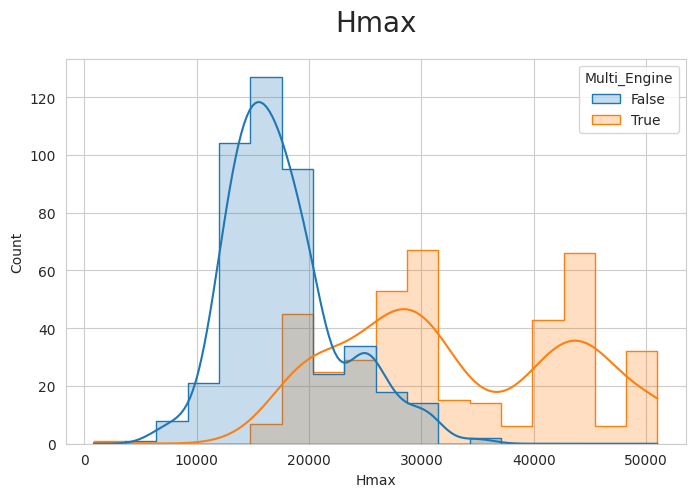

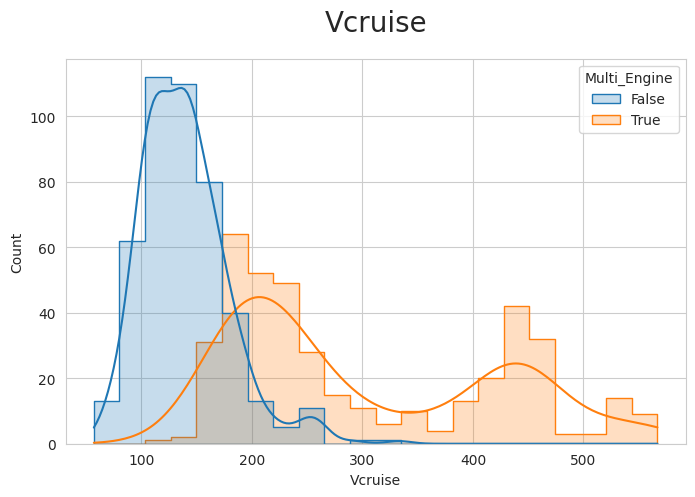

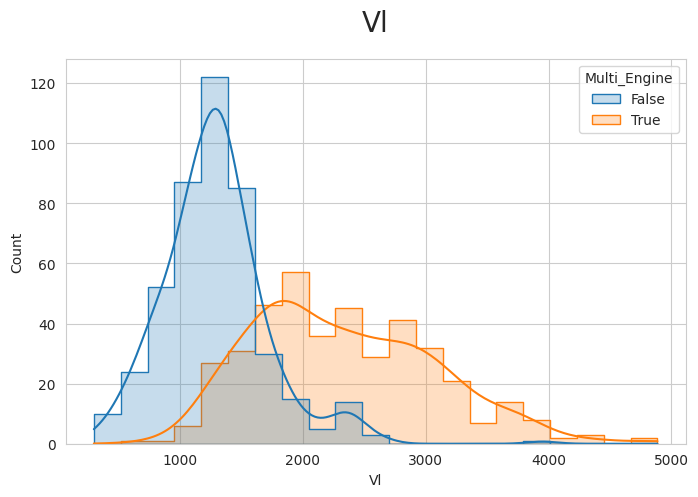

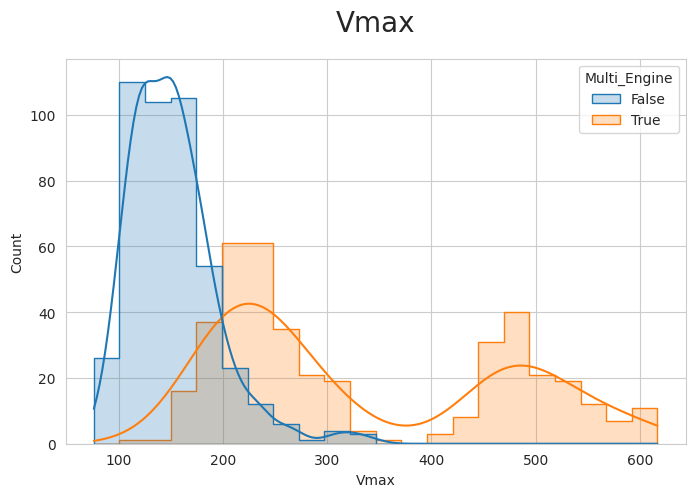

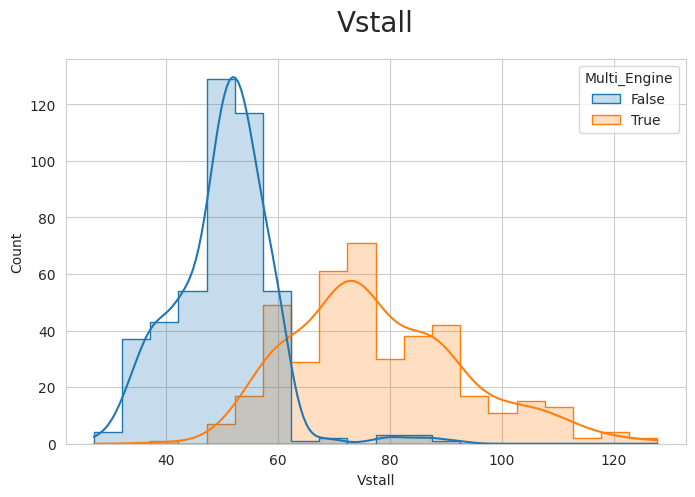

In [19]:
sns.set_style('whitegrid')


def plot_numerical(df, col, target_var):
    """
    Plot a histogram with KDE for a specified column,
    colored by a target variable.

    Parameters:
    df (DataFrame): The data to plot.
    col (str): The column to visualize.
    target_var (str): The target variable for coloring.

    Returns:
    None: Displays the plot.
    """
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue=target_var, kde=True, element="step")
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()

target_var = 'Multi_Engine'
for col in vars_to_study:
    plot_numerical(df_eda, col, target_var)
    print("\n\n")


---

## Parallel Plot

For the paralleled plot there is only relevant to include the interval which has data points and enough of data points. For this reason we cut of the lower and/or upper ends of the data range for the benefit of the paralleled Plot. However by making the first (lower) and last (upper) bin (interval) go to negative infinity and positive infinity respectively we do not throw away any values since they all enter into the plot.

Extreme values can sometimes skew data but not in this case since extreme performance airplanes really *does* exist and are relevant to our analysis *need* therefore to be included to not skew the graphs. This is however not true if we desire to only predict more conservative designs. In other words: if we want a prediction for conservative and conventional airplane design, then we should not include the outliers since these typically are the result of aggressice and extreme (non-conventional) designs!


In [20]:
# Step 1: Define the mapping arrays
# Maps hard coded based on inspection of the histogram plots under "Variables Distribution by Multi Engine" in this notebook.
Hmax_map = [-np.Inf, 23000, 32000, 42000, 50000, np.Inf]
Vcruise_map = [-np.Inf, 250, 350, 450, 550, np.Inf]
Vl_map = [-np.Inf, 2000, 3000, 4000, np.Inf]
Vmax_map = [-np.Inf, 250, 350, 450, 550, np.Inf]
Vstall_map = [-np.Inf, 70, 90, 110, np.Inf]

# Step 2: Combine all mappings into a single binning dictionary (Inbetween step necessary since we have multiple variables)
binning_dict = {
    'Hmax': Hmax_map,
    'Vcruise': Vcruise_map,
    'Vl': Vl_map,
    'Vmax': Vmax_map,
    'Vstall': Vstall_map
}

# Step 3: Initialize the ArbitraryDiscretiser with the combined binning dictionary
disc = ArbitraryDiscretiser(binning_dict=binning_dict)

# Step 4: Fit and transform the DataFrame
df_parallel = disc.fit_transform(df_eda)

# Display the first few rows of the transformed DataFrame
print(df_parallel.head())
df_parallel.head()


   Hmax  Vcruise  Vl  Vmax  Vstall Multi_Engine
0     0        0   0     0       0        False
1     0        0   0     0       0        False
2     0        0   0     0       0        False
3     0        0   0     0       0        False
4     0        0   0     0       0        False


,Hmax,Vcruise,Vl,Vmax,Vstall,Multi_Engine
0,0,0,0,0,0,False
1,0,0,0,0,0,False
2,0,0,0,0,0,False
3,0,0,0,0,0,False
4,0,0,0,0,0,False


In [21]:
# Fit and transform the DataFrame
df_parallel = disc.fit_transform(df_eda)

# Access the binning dictionaries after fitting
if hasattr(disc, 'binner_dict_'):
    print("Binning dictionary for Hmax:", disc.binner_dict_['Hmax'])
    print("Binning dictionary for Vcruise:", disc.binner_dict_['Vcruise'])
    print("Binning dictionary for Vl:", disc.binner_dict_['Vl'])
    print("Binning dictionary for Vmax:", disc.binner_dict_['Vmax'])
    print("Binning dictionary for Vstall:", disc.binner_dict_['Vstall'])
else:
    print("binner_dict_ does not exist. Please check if the discretiser was fitted successfully.")


Binning dictionary for Hmax: [-inf, 23000, 32000, 42000, 50000, inf]
Binning dictionary for Vcruise: [-inf, 250, 350, 450, 550, inf]
Binning dictionary for Vl: [-inf, 2000, 3000, 4000, inf]
Binning dictionary for Vmax: [-inf, 250, 350, 450, 550, inf]
Binning dictionary for Vstall: [-inf, 70, 90, 110, inf]


Create a map to replace the variable with more informative levels.

In [22]:
# Assuming disc is already fitted and contains the binning dictionary
labels_map = {}

# Iterate over each variable in the binning dictionary
for variable in disc.binner_dict_.keys():
    classes_ranges = disc.binner_dict_[variable][1:-1]  # Exclude -Inf and +Inf
    n_classes = len(classes_ranges) + 1  # Number of intervals/classes
    
    # Initialize labels for this variable
    variable_labels = {}
    
    for n in range(n_classes):
        if n == 0:
            variable_labels[n] = f"<{classes_ranges[0]}"
        elif n == n_classes - 1:
            variable_labels[n] = f"+{classes_ranges[-1]}"
        else:
            variable_labels[n] = f"{classes_ranges[n - 1]} to {classes_ranges[n]}"
    
    # Store the labels in the main labels_map
    labels_map[variable] = variable_labels

# Output the labels map for each variable
labels_map


{'Hmax': {0: '<23000',
  1: '23000 to 32000',
  2: '32000 to 42000',
  3: '42000 to 50000',
  4: '+50000'},
 'Vcruise': {0: '<250',
  1: '250 to 350',
  2: '350 to 450',
  3: '450 to 550',
  4: '+550'},
 'Vl': {0: '<2000', 1: '2000 to 3000', 2: '3000 to 4000', 3: '+4000'},
 'Vmax': {0: '<250',
  1: '250 to 350',
  2: '350 to 450',
  3: '450 to 550',
  4: '+550'},
 'Vstall': {0: '<70', 1: '70 to 90', 2: '90 to 110', 3: '+110'}}

Replace according to the labels_map

In [23]:
# Replace the values in df_parallel for each variable using the corresponding labels from labels_map
for variable, labels in labels_map.items():
    df_parallel[variable] = df_parallel[variable].replace(labels)

# Display the first few rows of the transformed DataFrame
df_parallel.head(10)


,Hmax,Vcruise,Vl,Vmax,Vstall,Multi_Engine
0,<23000,<250,<2000,<250,<70,False
1,<23000,<250,<2000,<250,<70,False
2,<23000,<250,<2000,<250,<70,False
3,<23000,<250,<2000,<250,<70,False
4,<23000,<250,<2000,<250,<70,False
5,<23000,<250,<2000,<250,<70,False
6,23000 to 32000,<250,2000 to 3000,250 to 350,70 to 90,True
7,23000 to 32000,<250,2000 to 3000,250 to 350,70 to 90,True
8,23000 to 32000,<250,2000 to 3000,250 to 350,70 to 90,True
9,23000 to 32000,<250,2000 to 3000,250 to 350,70 to 90,True


In [24]:
# Convert boolean to integer via replacing
df_parallel['Multi_Engine'] = df_parallel['Multi_Engine'].replace({True: 1, False: 0})
# Display the first few rows of the transformed DataFrame
df_parallel.head(10)

,Hmax,Vcruise,Vl,Vmax,Vstall,Multi_Engine
0,<23000,<250,<2000,<250,<70,0
1,<23000,<250,<2000,<250,<70,0
2,<23000,<250,<2000,<250,<70,0
3,<23000,<250,<2000,<250,<70,0
4,<23000,<250,<2000,<250,<70,0
5,<23000,<250,<2000,<250,<70,0
6,23000 to 32000,<250,2000 to 3000,250 to 350,70 to 90,1
7,23000 to 32000,<250,2000 to 3000,250 to 350,70 to 90,1
8,23000 to 32000,<250,2000 to 3000,250 to 350,70 to 90,1
9,23000 to 32000,<250,2000 to 3000,250 to 350,70 to 90,1


Creates multi-dimensional categorical data plot

In [25]:
fig = px.parallel_categories(df_parallel, color="Multi_Engine")   #fig = px.parallel_categories(df_parallel, color="Multi_Engine", color_discrete_sequence=["blue", "orange"])
fig.show(renderer='jupyterlab')

---

# Conclusions

* We suspect Airplanes with Multiple Engines are Higher, Further,
Faster as the slogan goes: Correct. The correlation study in the
'Multi Engine Airplane Study' supports that.

The study of the Airplane data showed a general Performance
increase in Service Ceiling (Hmax), Range, Cruise and Max speed
(Vcruise an Vmax), but also on the negative side: a higher 
landing speed and stall speed (Vl and Vstall).
This insight will enter into the Conceptual Design Prediction
tools."

---